In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math 
from csv import reader 
from collections import Counter



In [2]:
def kernel(X, Y):
    K = np.empty((len(X), len(Y)))
    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            K[i, j] = np.exp(-1/8. * np.linalg.norm([x - y], 2)**2)
    return K

In [3]:
def gaussianProcess(x1,y1,x2):
    s12 = kernel(x1,  x2)
    s22 = kernel(x2, x2)
    s11 = kernel(x1,  x1)
    s21 = kernel(x2, x1)
    noise = np.eye(s22.shape[0]) * 0.05
    mean = s12 @ np.linalg.inv(s22 + noise) @ y1
    cov  = s11 - (s12 @ np.linalg.inv(s22 + noise) @ s21)
    return mean,cov

In [4]:
def buildToyDataSet():
    ToyDat = np.random.uniform(low=0.1, high=1, size=(200,2))
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for i in range(0,200):
        ToyDat[i,1] = ToyDat[i,0] * 2.5 + np.random.uniform(low=0.05,high=0.35,size=(1))
        plot1 = ax.scatter(ToyDat[i,0], ToyDat[i,1], alpha=0.8, c='red', edgecolors='none', s=30,marker="*")
    ToyTest = np.random.uniform(low=0.1, high=1, size=(10,2))
    for i in range(0,10):
        ToyTest[i,1] = ToyTest[i,0] * 2.5+ np.random.uniform(low=0.05,high=0.35,size=(1))
        plot2 = ax.scatter(ToyTest[i,0], ToyTest[i,1], alpha=0.8, c='blue', edgecolors='none', s=30,marker="+")
    plot1.set_label('Training data')
    plot2.set_label('Test data')
    ax.legend()
    plt.show()
    return ToyDat, ToyTest

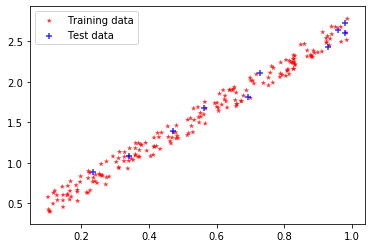

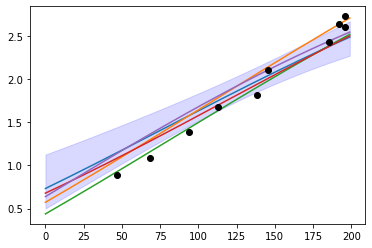

RMSE: 0.18588361997811956


In [5]:
trainingToy,testingToy = buildToyDataSet()
dims = testingToy.shape[1] - 1
testSize = trainingToy.shape[0]
domain = (np.amin(trainingToy[:,:-1]),np.amax(trainingToy[:,:-1]))
X2 = np.linspace(domain[0], domain[1], testSize).reshape(-1,1)
mean,cov = gaussianProcess(X2,testingToy[:,dims],testingToy[:,:-1])
dev = np.sqrt(np.diag(cov))
y_pred = np.random.multivariate_normal(mean, cov,size = 5)
plt.plot(np.arange(200), y_pred.T)
plt.plot((testingToy[:,0]*200),testingToy[:,dims],'ko')
plt.fill_between(np.arange(200),mean-2*dev,mean+2*dev,color='blue',alpha=0.15)
plt.show()
RMSE = 0.0
for i in range(0,10):
    xval = int(round(testingToy[i,0]*200))
    yval = testingToy[i,dims]
    RMSE += ((y_pred[0,xval] - yval)**2)
RMSE = RMSE / 10
RMSE = math.sqrt(RMSE)
print('RMSE:',RMSE)

In [6]:
filename = 'Desktop/CM50264/sarcos_inv.csv'
dataset = list()
with open(filename,'r') as file:
    csv_reader = reader(file)
    for row in csv_reader:
        if not row:
            continue
        dataset.append(row)
dataset = np.asarray(dataset, dtype=np.float32)
dims = dataset.shape[1]
testDataset = np.zeros([100,dims])
sampleDataset = np.zeros([1000,dims])
for i in range(1000,2000):
    sampleDataset[(i-1000),:] = dataset[(i),:]
for i in range(0,100):
    testDataset[i,:] = dataset[i,:]
dims = testDataset.shape[1] - 1
testSize = sampleDataset.shape[0]
X2 = np.zeros([testSize,dims])
for i in range(0,dims):
    domain = (np.amin(testDataset[:,i]),np.amax(testDataset[:,i]))
    Xspace = np.linspace(domain[0], domain[1], testSize)
    X2[:,i] = Xspace
mean,cov = gaussianProcess(X2,testDataset[:,dims],testDataset[:,:-1])
dev = np.sqrt(np.diag(cov))
y_pred = np.random.multivariate_normal(mean, cov,size = 5)
y_pred = y_pred * 30
testDataset[:,0] = testDataset[:,0]-np.amin(testDataset[:,0])
rangeVal = np.amax(testDataset[:,0])
bestRMSE = 0.0
inc = (rangeVal / 1000)
for i in range(0,5):
    RMSE = 0.0
    for j in range(0,100):
        xval = int(round(testDataset[j,0]/inc))
        yval = testDataset[j,dims]
        if xval >= 1000:
            xval = 999
        RMSE += ((y_pred[0,xval] - yval)**2)
    RMSE = RMSE/ 100
    RMSE = math.sqrt(RMSE)
    if (RMSE < bestRMSE) or (bestRMSE == 0.0):
        bestRMSE = RMSE 
print('Best RMSE:',bestRMSE)

Best RMSE: 35.69717026631414
